In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('All_Trials.csv')
df

,EMD,EMD_error,trial_index,arm_name,filters_1,kernel_1,stride_1,learning_rate,batch_size,pooling_1,trial_status,generation_method,units_1,OPs,info
0,3.401,1.489,0,0_0,64.0,1.0,2.0,0.012659,250,True,COMPLETED,Sobol,NaN,12304,"C: [64], K: [1], P: ['True'], S: [2], D: []"
1,2.328,0.984,1,1_0,8.0,5.0,4.0,0.092533,100,True,COMPLETED,Sobol,NaN,1936,"C: [8], K: [5], P: ['True'], S: [4], D: []"
2,3.227,1.450,2,2_0,64.0,1.0,2.0,0.080471,200,True,COMPLETED,Sobol,NaN,12304,"C: [64], K: [1], P: ['True'], S: [2], D: []"
3,3.220,1.278,3,3_0,8.0,3.0,4.0,0.062039,300,True,COMPLETED,Sobol,NaN,912,"C: [8], K: [3], P: ['True'], S: [4], D: []"
4,1.201,0.357,4,4_0,16.0,5.0,2.0,0.001266,50,True,COMPLETED,Sobol,NaN,15376,"C: [16], K: [5], P: ['True'], S: [2], D: []"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.190,0.369,35,35_0,NaN,NaN,NaN,0.079917,200,NaN,COMPLETED,GPEI,64.0,10320,"C: [], K: [3], P: [], S: [], D: [64]"
116,1.190,0.369,36,36_0,NaN,NaN,NaN,0.079714,200,NaN,COMPLETED,GPEI,64.0,10320,"C: [], K: [3], P: [], S: [], D: [64]"
117,1.190,0.369,37,37_0,NaN,NaN,NaN,0.079518,200,NaN,COMPLETED,GPEI,64.0,10320,"C: [], K: [3], P: [], S: [], D: [64]"
118,1.190,0.369,38,38_0,NaN,NaN,NaN,0.079541,200,NaN,COMPLETED,GPEI,64.0,10320,"C: [], K: [3], P: [], S: [], D: [64]"


In [4]:
emd = df.loc[:,"EMD"]
error = df.loc[:,"EMD_error"]
ops = df.loc[:,"OPs"]
info = df.loc[:,'info']

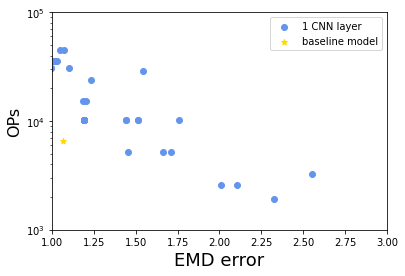

In [11]:
fig, ax = plt.subplots()

labled = [False,False,False,False]
for o,e,i in zip(ops, emd, info):
       num_layers = int(i.split('[')[1].split(']')[0].count(','))+1
       if num_layers == 0:
              if labled[0]:
                     ax.scatter(e,o, color='lightsteelblue')
              else:
                     ax.scatter(e,o, color='lightsteelblue', label='0 CNN layer')
                     labled[0] = True
       elif num_layers == 1:
              if labled[1]:
                     ax.scatter(e,o, color='cornflowerblue')
              else:
                     ax.scatter(e,o, color='cornflowerblue', label='1 CNN layer')
                     labled[1] = True
       elif num_layers == 2:
              if labled[2]:
                     ax.scatter(e,o, color='royalblue')
              else:
                     ax.scatter(e,o, color='royalblue', label='2 CNN layer')
                     labled[2] = True
       else:
              if labled[3]:
                     ax.scatter(e,o, color='midnightblue')
              else:
                     ax.scatter(e,o, color='midnightblue', label='3 CNN layer')
                     labled[3] = True
ax.scatter(1.067,6544, marker='*', c='gold', label="baseline model")

ax.set_yscale('log')
ax.scatter(1.067,6544, marker='*', c='gold', label="baseline model")
ax.set(xlim=(1, 3),
       ylim=(1e3, 1e5))
plt.legend(loc='upper right')
plt.xlabel('EMD', fontsize=18)
plt.ylabel('OPs', fontsize=16)
plt.savefig('EMDvsOPS.jpg', dpi=1000)

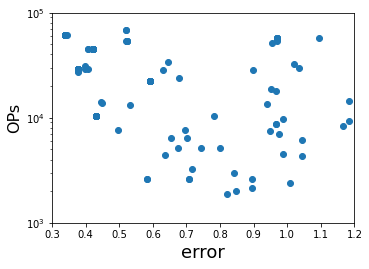

In [21]:
fig, ax = plt.subplots()
ax.scatter(error,ops)
ax.set_yscale('log')
ax.set(xlim=(0.3, 1.2),
       ylim=(1e3, 1e5))
plt.xlabel('error', fontsize=18)
plt.ylabel('OPs', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('EMDerrorvsOPS.jpg', dpi=1000)